**Import the relevant libraries**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

**Load the data**

In [7]:
customer_features1 = pd.read_csv('customer_features1.csv')

In [9]:
customer_features1

,CustomerID,CustGender,CustLocation,Age,Recency,Frequency,AvgMonetary,TotalMonetary
0,C1010011,F,NEW DELHI,24,74,2,7.171923,14.343846
1,C1010012,M,MUMBAI,22,117,1,7.313220,7.313220
2,C1010014,F,MUMBAI,32,154,2,6.310259,12.620517
3,C1010018,F,CHAMPARAN,26,85,1,3.433987,3.433987
4,C1010024,M,KOLKATA,28,113,1,8.517393,8.517393
...,...,...,...,...,...,...,...,...
814186,C9099836,M,BHIWANDI,26,154,1,6.539586,6.539586
814187,C9099877,M,BANGALORE,20,85,1,5.407172,5.407172
814188,C9099919,M,GUNTUR,23,113,1,4.844187,4.844187
814189,C9099941,M,CHENNAI,21,103,1,3.931826,3.931826


**Select the features**

In [13]:
x = customer_features1.iloc[:, 3:8]

In [15]:
x

,Age,Recency,Frequency,AvgMonetary,TotalMonetary
0,24,74,2,7.171923,14.343846
1,22,117,1,7.313220,7.313220
2,32,154,2,6.310259,12.620517
3,26,85,1,3.433987,3.433987
4,28,113,1,8.517393,8.517393
...,...,...,...,...,...
814186,26,154,1,6.539586,6.539586
814187,20,85,1,5.407172,5.407172
814188,23,113,1,4.844187,4.844187
814189,21,103,1,3.931826,3.931826


**Clustering**

In [20]:
kmeans = KMeans(3)

In [22]:
kmeans.fit(x)

KMeans(n_clusters=3)

**Clustering result**

In [25]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 0, 0, ..., 0, 0, 2])

In [27]:
#create a dataframe to see things more clearly
data_with_clusters = customer_features1.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,CustomerID,CustGender,CustLocation,Age,Recency,Frequency,AvgMonetary,TotalMonetary,Cluster
0,C1010011,F,NEW DELHI,24,74,2,7.171923,14.343846,2
1,C1010012,M,MUMBAI,22,117,1,7.313220,7.313220,0
2,C1010014,F,MUMBAI,32,154,2,6.310259,12.620517,0
3,C1010018,F,CHAMPARAN,26,85,1,3.433987,3.433987,0
4,C1010024,M,KOLKATA,28,113,1,8.517393,8.517393,0
...,...,...,...,...,...,...,...,...,...
814186,C9099836,M,BHIWANDI,26,154,1,6.539586,6.539586,0
814187,C9099877,M,BANGALORE,20,85,1,5.407172,5.407172,0
814188,C9099919,M,GUNTUR,23,113,1,4.844187,4.844187,0
814189,C9099941,M,CHENNAI,21,103,1,3.931826,3.931826,0


**Selecting the number of clusters using the elbow method**

In [32]:
kmeans.inertia_

727336510.0374475

In [34]:
#to plot the elbow, we need to calculate the WCSS for each cluster
#we do this with a loop
wcss=[]
for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [36]:
wcss

[5285376724.623573,
 1326602609.3099985,
 727336510.0374475,
 390660897.98482287,
 260649680.21074522,
 169964372.57342216,
 128451816.01642503,
 108492589.12118524,
 91631494.31531765,
 76231324.27529189]

**The elbow method**

Text(0, 0.5, 'Within-Cluster Sum of Squares')

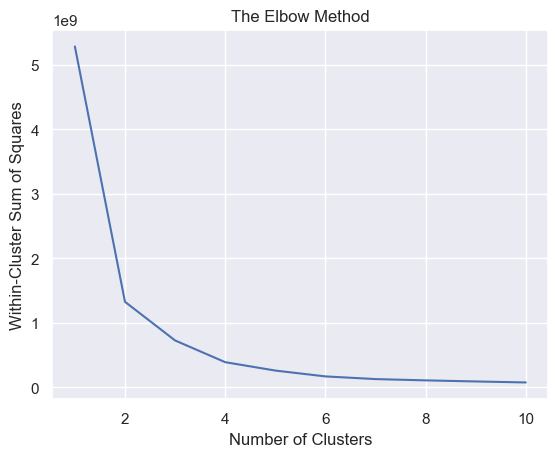

In [41]:
number_clusters = range(1,11)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')